Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score   #this is for measuring how good our model is

data collection and data processing

In [2]:
# here we will import the dataset without header
df = pd.read_csv("datasets/sonar data.csv",header= None)

In [3]:
# size of the dataset
df.shape

(208, 61)

# data analysis and visualisation

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
# according to this, there are no missing values hence no need to clean the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

#### the following is a series of visualisation to better understand the distribution of the values

In [6]:
X = df.drop(columns=60,axis =1)

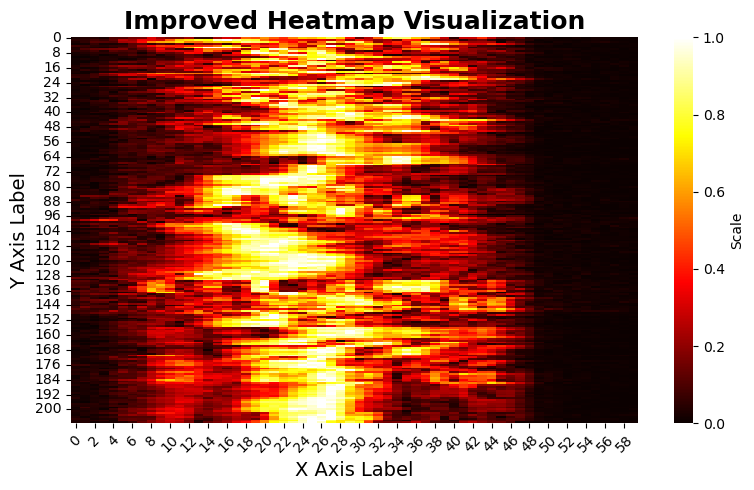

In [7]:
# heatmap
plt.figure(figsize=(8,5))
heatmap = sns.heatmap(X,cmap="hot", cbar_kws={'label': 'Scale'})

heatmap.set_title('Improved Heatmap Visualization', fontsize=18, fontweight='bold')
heatmap.set_xlabel('X Axis Label', fontsize=14)
heatmap.set_ylabel('Y Axis Label', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()

plt.show()

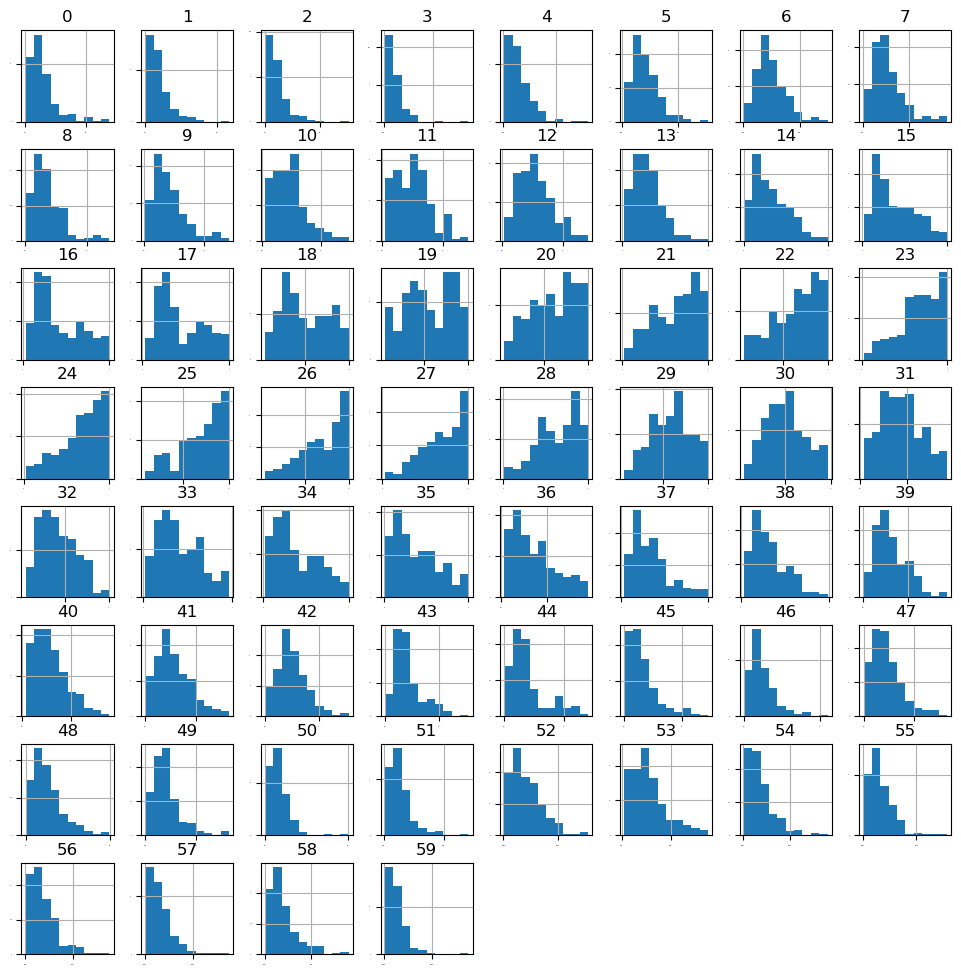

In [8]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

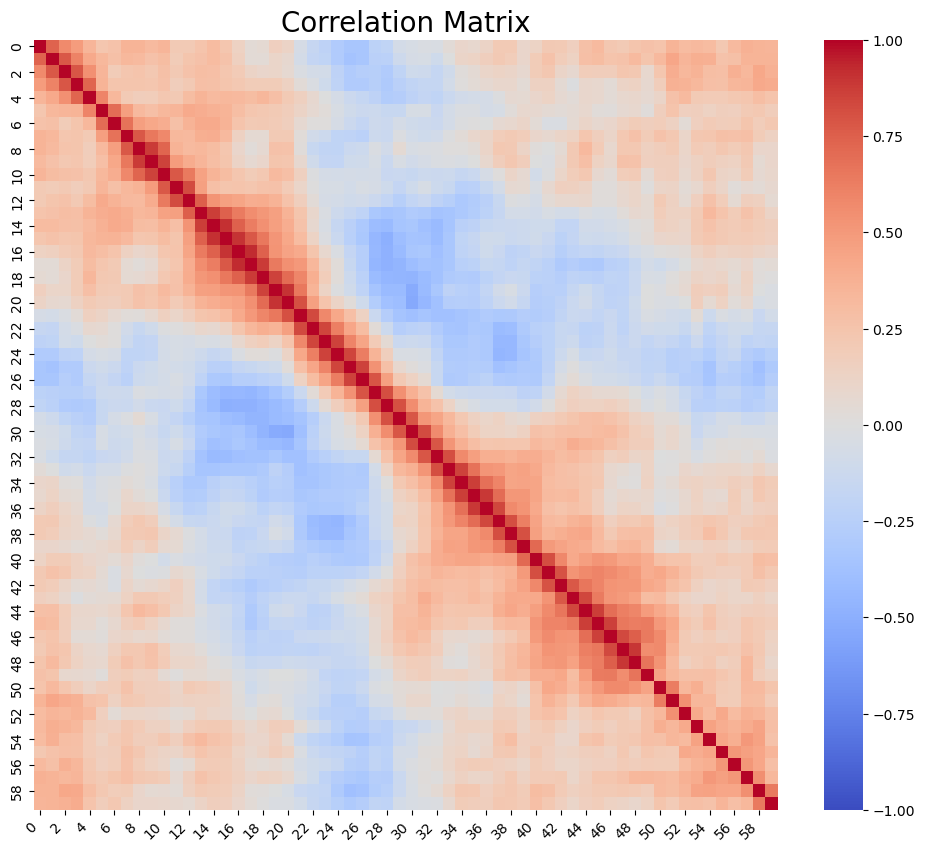

In [9]:
# correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix,cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix', size=20)
plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.show()

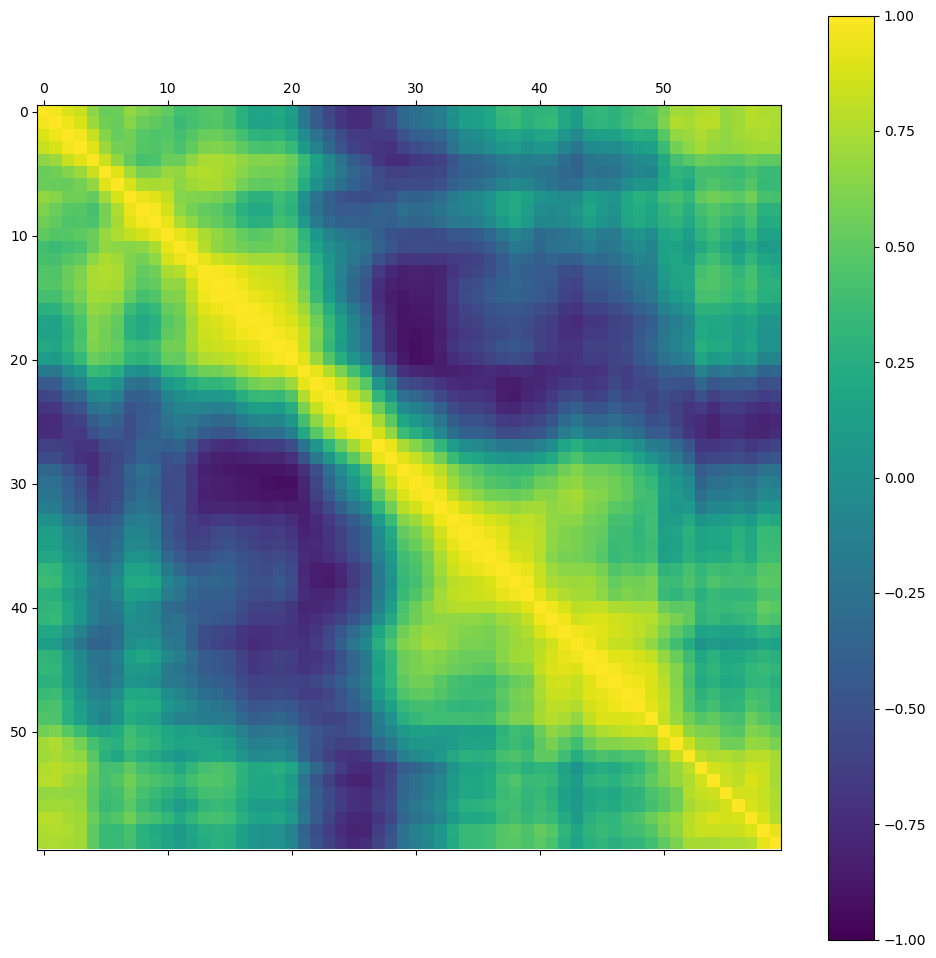

In [10]:
# alternative visualisation for the correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(12,12)
plt.show()

In [11]:
# statical description of the data
pd.set_option('display.precision', 3)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [12]:
# we will now see the distribution of the 2 outcomes, rock or mine
df[60].value_counts()
# the amounts of both are almost equal so we can use it as it is
# M = Mine
# R = Rock

60
M    111
R     97
Name: count, dtype: int64

In [13]:
# we will be using the mean value to predict whether unknow data represents R or M
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.035,0.046,0.051,0.065,0.087,0.112,0.128,0.150,0.213,0.251,...,0.019,0.016,0.012,0.012,0.010,0.009,0.008,0.009,0.009,0.007
R,0.022,0.030,0.036,0.041,0.062,0.096,0.114,0.118,0.137,0.159,...,0.012,0.010,0.010,0.010,0.009,0.007,0.008,0.007,0.007,0.006


In [14]:
# separating the dataset into data and labels
X = df.drop(columns=60,axis =1)
Y = df[60]

In [15]:
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.023,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.013,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.003,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.024,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.016,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.019,0.035,0.017,0.018,0.039,0.163,0.203,0.169,0.233,0.268,...,0.020,0.012,0.010,0.020,0.003,0.010,0.006,0.011,0.019,0.016
204,0.032,0.010,0.030,0.056,0.076,0.096,0.099,0.102,0.103,0.215,...,0.005,0.006,0.009,0.013,0.006,0.006,0.003,0.003,0.006,0.007
205,0.052,0.044,0.018,0.029,0.035,0.117,0.126,0.118,0.126,0.253,...,0.015,0.016,0.003,0.005,0.006,0.009,0.014,0.014,0.008,0.003
206,0.030,0.035,0.049,0.061,0.017,0.135,0.146,0.112,0.195,0.235,...,0.004,0.009,0.005,0.013,0.004,0.004,0.003,0.008,0.004,0.005


In [16]:
Y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [17]:
# next we will split the data into test and train data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [18]:
X_train.shape

(187, 60)

In [19]:
X_test.shape

(21, 60)

In [20]:
# now we will be training our ML model
# we will be using a Logistic Regression model as it great with predicting binary option output
model = LogisticRegression()

In [21]:
model.fit(X_train,Y_train)

LogisticRegression()

In [22]:
# now we will evaluate the accuracy of our model on the training data first then on the test data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)  #here we have inputted first our predicted answers and then the actual answers


In [23]:
print(f"the accuracy score is: {training_data_accuracy}")

the accuracy score is: 0.8342245989304813


In [24]:
# we will evaluate the performace of our model on unknown data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [25]:
print(f"the accuracy score is: {test_data_accuracy}")

the accuracy score is: 0.7619047619047619


we will now create a predictive system

In [26]:
# now we will take a random row of our original data and check if it is predicted correctly
input_data = (0.0286, 0.0453, 0.0277, 0.0174, 0.0384, 0.099, 0.1201, 0.1833,
       0.2105, 0.3039, 0.2988, 0.425, 0.6343, 0.8198, 1.0, 0.9988, 0.9508,
       0.9025, 0.7234, 0.5122, 0.2074, 0.3985, 0.589, 0.2872, 0.2043,
       0.5782, 0.5389, 0.375, 0.3411, 0.5067, 0.558, 0.4778, 0.3299,
       0.2198, 0.1407, 0.2856, 0.3807, 0.4158, 0.4054, 0.3296, 0.2707,
       0.265, 0.0723, 0.1238, 0.1192, 0.1089, 0.0623, 0.0494, 0.0264,
       0.0081, 0.0104, 0.0045, 0.0014, 0.0038, 0.0013, 0.0089, 0.0057,
       0.0027, 0.0051, 0.0062)

# changing input data to a Numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape so that the array reflects only one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

In [27]:
# this so the row of data we are using as our input data, the output should be R
df.iloc[5].values

array([0.0286, 0.0453, 0.0277, 0.0174, 0.0384, 0.099, 0.1201, 0.1833,
       0.2105, 0.3039, 0.2988, 0.425, 0.6343, 0.8198, 1.0, 0.9988, 0.9508,
       0.9025, 0.7234, 0.5122, 0.2074, 0.3985, 0.589, 0.2872, 0.2043,
       0.5782, 0.5389, 0.375, 0.3411, 0.5067, 0.558, 0.4778, 0.3299,
       0.2198, 0.1407, 0.2856, 0.3807, 0.4158, 0.4054, 0.3296, 0.2707,
       0.265, 0.0723, 0.1238, 0.1192, 0.1089, 0.0623, 0.0494, 0.0264,
       0.0081, 0.0104, 0.0045, 0.0014, 0.0038, 0.0013, 0.0089, 0.0057,
       0.0027, 0.0051, 0.0062, 'R'], dtype=object)

In [28]:
prediction = model.predict(input_data_reshaped)

In [29]:
if prediction[0] == "R":
  print("The object prediction is a Rock")
else:
  print("The object prediction is a Mine")


The object prediction is a Rock
